In [1]:
using Pkg; Pkg.activate("."); 
using MUST
using PyPlot
using PyCall
using FortranFiles
using Statistics

MUST.@get_help_py stagger
MUST.@get_help visual ;

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/stagger2bifrost/Project.toml`
┌ Info: Precompiling MUST [78ff202f-d08f-4a78-aa4d-c8e96fa3dcb9]
└ @ Base loading.jl:1342


In [2]:
folder = "stagger_sun/"
model  = "t5777g44m0005";

We can use the additional help from the Python reader for Stagger snapshots and convert it to a Julia ``StaggerLegacySnap`` object. We can also use the Stagger reader in Julia directly using the ``StaggerSnap`` struct.

In [3]:
snap_j = MUST.StaggerSnap(model, folder);

┌ Warning: bx not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332
┌ Warning: by not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332
┌ Warning: bz not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332


Now we can convert the ``StaggerSnap`` to the Bifrost format

In [4]:
MUST.StaggerMesh2BifrostMesh(snap_j, cutlb=5, cutub=5)

In [5]:
MUST.StaggerSnap2BifrostSnap(snap_j, cutlb=5, cutub=5)

In [6]:
MUST.StaggerAux2BifrostAux(snap_j, cutlb=5, cutub=5)

In [7]:
MUST.stagger_endian[] = "little-endian" 

"little-endian"

In [15]:
aux_file  = joinpath(folder,model*"_bifrost.aux")
aux_order = ["lpp", "ltemp"]
result    = Dict{String,Array{Float32,3}}()
for (i,para) in enumerate(aux_order)
    if true
        result[para] = begin
            f = FortranFile(aux_file,"r",access="direct",recl=(240*240*230)*4, convert="little-endian")
            var = read(f,rec=i,(Float32,(240,240,230)));
            close(f)
            var
        end
        #reverse!(result[para]; dims=3)
    else 
        #=if isa(e, EOFError)
            @warn "$(para) not present."
        else
            throw(e)
        end=#
    end
end

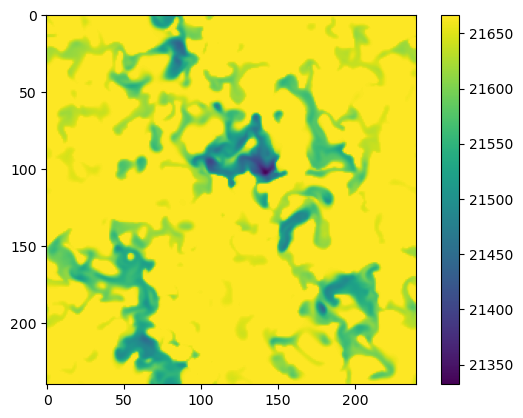

PyObject <matplotlib.colorbar.Colorbar object at 0x2af496f7bd90>

In [17]:
plt.imshow(result["ltemp"][:,:,230])
plt.colorbar()

In [ ]:
#snapB = MUST.BifrostSnap(model*"_bifrost", folder);